<a href="https://colab.research.google.com/github/Ovrup/EVA-Assignment-4/blob/master/FourthCodeAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4th Code Assignment 4**

This is same architecture from 3rd code but dropout is added. The no of parameters are also same as previous one. I used SGD here instead of Adam & learning rate scheduler also discarded. Batch size is 128. After 20 epoch achieved final validation accuracy 99.4%

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Importing all necessary modules in Keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

from keras.datasets import mnist

In [0]:
# mnist.load_data() function download the MNIST data set(Images of hand written digits) & divide it into training set & test set.
# X_train holds the training samples & y_train holds the corresponding labels for training data. Likewise, X_test holds test data & y_test has the labels.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


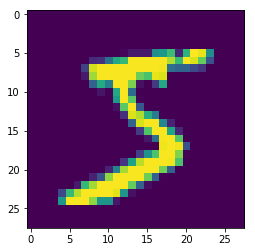

In [64]:
# X_train is a matrix which has 60K images each of size 28*28. X_train.shape returns the shape of the total training set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
# visulaization of the 1st sample of training set which is an image of 5 as shown below.
plt.imshow(X_train[0])

In [0]:
# The train & test set are 3D matrix.The training set is of shape (60000,28,28) & test set is (10000,28,28). But here the CNN model expects
# the input shape to be 4D i.e (no of samples,height,width,channel).Channel implies whether the image is gray scale or colour(RGB). In case of
# RGB image the 4th dimension would be 3. In this case the images are gray scale. Hence, it is 1. That's why training & test set are reshaped into
# matrices of shape (60000,28,28,1) & (10000,28,28,1) respectively.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# The data sets are matrices which has values between 0-255. These are normally the pixel values. It is a good practice to normalise the pixels.
#  Hence, dividing by 255 scales down each pixel values between 0-1. But before doing that the data set values has to be converted to float to make sure
# after dividing by 255 these are stored as float.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [67]:
# 1st 10 labels for training set. As printed below the 1st element is 5 which implies the 1st image of training set is of digit 5 and so on. 
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# As shown above the label matrix(Y_train & Y_test) holds values that implies what digit the image is about. So, keras may find some relational order
# between these values. To avoid this problem we hot encode the matrix into a binary matrix. This matrix has number of columns equal to the number
# of classes(10 columns in this scenario). Each row defines the label of one sample point in data set & has only one '1' & others are '0'. '1' at
# particular index position implies the digit equal to the column number. For example, the 1st row(1st sample of training data set) has '1' at column
# number 5(starting from 0) which means this is image of digit 5.
# Convert 1-dimensional class arrays to 10-dimensional class matrices 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [69]:
# Label matrix hot encoded into binary matrix
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation

model = Sequential()

# Input = 28*28*1
model.add(Convolution2D(10, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

# Input = 26*26*10
model.add(Convolution2D(16, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
# Input = 24*24*16
model.add(Convolution2D(16, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

# Input = 22*22*16
model.add(Convolution2D(10, kernel_size=(1,1), activation='relu'))
model.add(BatchNormalization())
# Input = 22*22*10
model.add(MaxPooling2D(pool_size = (2,2)))

# Input = 11*11*10
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
# Input = 9*9*16
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

# Input = 7*7*16
model.add(Convolution2D(10, kernel_size=(1,1), activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.15))

# Input = 7*7*10
model.add(Convolution2D(10, 7))

# Input = 1*1*10
model.add(Flatten())
model.add(Activation('softmax'))

In [93]:
# summary() function displays the model structure i.e for each layer how many parameters used, what is the shape of output image
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_83 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_47 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_84 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_85 (Batc (None, 22, 22, 16)        64        
__________

In [0]:

from keras.optimizers import SGD

In [0]:
# Compile the model with SGD optimizer. Since this is multi class problem (10 classes) 'categorical_crossentropy' is used as loss function.
# accuracy is used as metrics which means while training this accuracy metrics will be monitored.
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.01,decay = 0.00001, momentum = 0.8),
             metrics=['accuracy'])

In [102]:
# Train the model with fit() which takes the training data set along with the label matrix. Epoch means one round of the whole data set. Batch size
# determines in an epoch how many images to be processed parallelly. Batch size 32 means in an epoch in one iteration 32 images are processed.
model.fit(X_train, Y_train, batch_size=128, epochs=20,validation_data = (X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0073 - acc: 0.9974 - val_loss: 0.0226 - val_acc: 0.9939
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0070 - acc: 0.9975 - val_loss: 0.0222 - val_acc: 0.9941
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0222 - val_acc: 0.9939
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0056 - acc: 0.9980 - val_loss: 0.0222 - val_acc: 0.9938
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0222 - val_acc: 0.9940
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0224 - val_acc: 0.9936
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.0220 - val

In [103]:
# Now the model is trained which means the weights are optimized. model.evaluate() predicts the classes of each image in test set & then calculate
# test set loss & accuracy.
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 94us/step


In [104]:
# score is a vector that holds the test set loss & accuracy
print(score)

[0.022523940222770853, 0.994]


In [0]:
# Predict the class of each image in test set & stores in y_pred matrix
y_pred = model.predict(X_test)

In [106]:
print(y_pred[:9])
print(y_test[:9])

[[3.1839149e-15 1.1409783e-14 7.5047656e-13 6.9255528e-13 2.5250862e-19
  9.0720928e-17 1.7745183e-21 1.0000000e+00 2.1962286e-18 5.3771573e-14]
 [3.7761627e-08 1.4465726e-09 1.0000000e+00 3.3211725e-14 5.1054918e-13
  1.8442158e-20 2.1938123e-11 3.1135874e-13 7.8683737e-14 7.4114985e-15]
 [4.7409854e-09 1.0000000e+00 9.3281936e-12 1.3643670e-10 4.4028950e-10
  2.7875084e-08 7.3854434e-09 2.4037741e-09 1.3961973e-10 3.4630323e-13]
 [9.9999809e-01 5.4025313e-17 3.1478360e-15 1.4516810e-12 2.3180788e-14
  2.1091951e-13 1.8751088e-06 2.0172034e-14 7.5731366e-10 4.5210483e-10]
 [1.1487152e-17 6.0208934e-13 2.6231463e-15 5.6773224e-17 1.0000000e+00
  5.3772110e-17 3.8185943e-14 7.6764261e-16 2.0379924e-12 2.5218452e-09]
 [8.4744117e-10 1.0000000e+00 1.7658973e-11 1.0636979e-13 1.2174946e-10
  2.6144656e-11 1.6032994e-10 7.0318085e-10 8.6484882e-12 1.4887805e-14]
 [4.1276260e-21 1.0018353e-10 1.4434097e-15 7.4035146e-19 1.0000000e+00
  1.0360305e-15 9.3474362e-18 5.2525036e-11 5.6746951e-12 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()